<center><h1 style="font-size:50px; font-family: 'ALGERIAN'; letter-spacing: 0.1em; background-color: RGB(128,0,128);"> <br> Statistiques Exploratoires Spatiales (avec Python) <br> </h1></center>
<center><h3 style="font-size:25px; font-family: 'Calisto MT'; letter-spacing: 0.1em; background-color: RGB(51,165,182);"> Réalisé par le Groupe 3 </h3></center>
ENSAE 2024 : ISE1 CL

<center><h2 style="font-size:28px; font-family: 'Calisto MT'; letter-spacing: 0.1em;"> TP2  </h2></center>

__________________________________________________________________________________________

# Importation des fichiers

In [21]:
#importation des libraries

import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib_scalebar.scalebar import ScaleBar

# Définition de notre work directory
directory= 'C:/Users/DELL/Documents/ISEP3_2025/Stats_spatiale/TP/TP2'
#'C:/Users/samba/Desktop/stat_spatiale/Statistique-Exploratoire-Spatiale/Malaria/'
os.chdir(directory)

In [29]:
# Importatation du shapefile contenant les divisions administratives
shapefile = 'cmr_admbnda_adm3_inc_20180104.shp'

# Importation des .tiff
tiff_files = [
    'Malaria/202406_Global_Pf_Parasite_Rate_CMR_{}.tiff'.format(i)
    for i in range(2000, 2023)
]

<h2 style="text-align:center; background-color:RGB(105,40,182);font-size:45px;font-family:Algerian; font-color:RGB(255,255,255)">  <br>Section 1 : Calculs statistiques et visualisation des données vecteur <br> </h2>

In [7]:
# Charger le shapefile avec geopandas
gdf = gpd.read_file(shapefile) # Level 3

# Vérifier et changer la projection utilisée

In [30]:
# Vérifier le système de coordonnées actuel
print("Système de coordonnées actuel :", gdf.crs)

Système de coordonnées actuel : EPSG:4326


_

In [31]:
# Reprojeter vers un autre système de coordonnées (par exemple, EPSG:3857)
# convertir de WGS 84 (EPSG:4326) à Mercator (EPSG:3857)


### gdf_reprojete = gdf.to_crs(epsg=3857)

# Nombre de géométries et centroïdes

In [32]:
# Connaitre le nombre de géométries
shapefile0 =  gpd.read_file('cmr_admbnda_adm0_inc_20180104.shp')
shapefile1 =  gpd.read_file('cmr_admbnda_adm1_inc_20180104.shp')
shapefile2 =  gpd.read_file('cmr_admbnda_adm2_inc_20180104.shp')
shapefile3 =  gpd.read_file('cmr_admbnda_adm3_inc_20180104.shp')

print(f"Il y a {shapefile0.shape[0]} géométrie (le pays).")
print(f"Il y a {shapefile1.shape[0]} régions.")
print(f"Il y a {shapefile2.shape[0]} départements.")
print(f"Il y a {shapefile3.shape[0]} arrondissements.")

Il y a 1 géométrie (le pays).
Il y a 10 régions.
Il y a 58 départements.
Il y a 360 arrondissements.


In [8]:
# Visualiser la base
gdf.head(5)

Shape_Leng  Shape_Area ADM3_EN      ADM3_FR   ADM3_PCODE ADM3_REF  \
0    1.833385    0.138089    None  Abong-Mbang  CM003002001     None   
1    0.652297    0.020600    None     Afanloum  CM002005001     None   
2    1.633150    0.090047    None          Ako  CM007003001     None   
3    0.979868    0.054025    None      Akoeman  CM002010001     None   
4    2.125174    0.157089    None       Akom 2  CM009003001     None   

  ADM3ALT1EN ADM3ALT2EN ADM3ALT1FR ADM3ALT2FR  ...     ADM1_EN     ADM1_FR  \
0       None       None       None       None  ...        East         Est   
1       None       None       None       None  ...      Centre      Centre   
2       None       None       None       None  ...  North-West  Nord-Ouest   
3       None       None       None       None  ...      Centre      Centre   
4       None       None       None       None  ...       South         Sud   

  ADM1_PCODE   ADM0_EN        ADM0_FR ADM0_PCODE       date    validOn  \
0      CM003  Cameroon  Cameroun (le)         CM 2018-12-17 2019-01-04   
1      CM002  Cameroon  Cameroun (le)         CM 2018-12-17 2019-01-04   
2      CM007  Cameroon  Cameroun (le)         CM 2018-12-17 2019-01-04   
3      CM002  Cameroon  Cameroun (le)         CM 2018-12-17 2019-01-04   
4      CM009  Cameroon  Cameroun (le)         CM 2018-12-17 2019-01-04   

      validTo                                           geometry  
0  0000/00/00  POLYGON ((12.97725 4.01685, 12.98532 4.01856, ...  
1  0000/00/00  POLYGON ((12.10679 4.10127, 12.10038 4.09702, ...  
2  0000/00/00  POLYGON ((10.81914 6.84861, 10.81696 6.8479, 1...  
3  0000/00/00  POLYGON ((11.64515 3.37503, 11.65412 3.37073, ...  
4  0000/00/00  POLYGON ((10.26431 2.59458, 10.262 2.6008, 10....  

[5 rows x 23 columns]

In [34]:
# Voyons la variable geometry
pd.concat([gdf.geom_type, gdf['geometry']], axis=1)

0                                           geometry
0    Polygon  POLYGON ((12.97725 4.01685, 12.98532 4.01856, ...
1    Polygon  POLYGON ((12.10679 4.10127, 12.10038 4.09702, ...
2    Polygon  POLYGON ((10.81914 6.84861, 10.81696 6.8479, 1...
3    Polygon  POLYGON ((11.64515 3.37503, 11.65412 3.37073, ...
4    Polygon  POLYGON ((10.26431 2.59458, 10.262 2.6008, 10....
..       ...                                                ...
355  Polygon  POLYGON ((10.36017 4.75777, 10.3607 4.76042, 1...
356  Polygon  POLYGON ((16.0737 2.70936, 16.06016 2.71222, 1...
357  Polygon  POLYGON ((11.94463 4.63021, 11.94385 4.63084, ...
358  Polygon  POLYGON ((15.04867 10.99912, 15.04329 10.99945...
359  Polygon  POLYGON ((11.69255 3.08611, 11.69575 3.09178, ...

[360 rows x 2 columns]

In [9]:
print(f"Coordonnées du polygone (20 premiers points) : {list(gdf.loc[0, 'geometry'].exterior.coords)[:20]}")

Coordonnées du polygone (20 premiers points) : [(12.977251600000045, 4.016847400000074), (12.985319700000048, 4.018559800000048), (12.989954600000033, 4.021642100000065), (12.995619400000066, 4.023183300000028), (12.99530180000005, 4.027421400000037), (13.00079500000004, 4.034613300000046), (13.012639600000057, 4.0388942000000725), (13.017077100000051, 4.039108300000066), (13.022581600000024, 4.04075030000007), (13.028775800000062, 4.038038000000029), (13.037358900000072, 4.047284700000034), (13.046431200000029, 4.046462800000029), (13.052293400000053, 4.041291500000057), (13.060507400000063, 4.039622000000065), (13.067717200000061, 4.04098330000005), (13.070463800000027, 4.041325800000038), (13.07492700000006, 4.045606600000042), (13.080935100000033, 4.045606600000042), (13.087655700000028, 4.043003800000065), (13.09466800000007, 4.0370534000000475)]


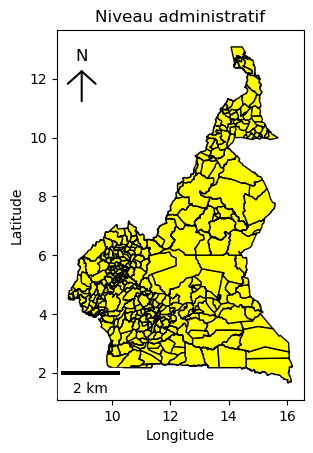

In [36]:
# Visualisation des géométries avec une flèche du nord et une échelle
fig, ax = plt.subplots()
gdf.plot(edgecolor='black', facecolor='yellow', ax=ax)

# Titre et étiquettes des axes
ax.set_title('Niveau administratif')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Ajouter une flèche du nord compacte en haut à gauche
ax.annotate(
    '', xy=(0.1, 0.9), xytext=(0.1, 0.8),  # Ajuste la position de la pointe et de la base de la flèche
    arrowprops=dict(arrowstyle="->,head_length=0.9,head_width=1", color="black", lw=1.5),
    xycoords='axes fraction', textcoords='axes fraction'
)
# Ajouter la lettre 'N' au-dessus de la flèche
ax.text(0.1, 0.93, 'N', transform=ax.transAxes, ha='center', va='center', fontsize=12, color='black')

# Ajouter une échelle en bas à gauche
scalebar = ScaleBar(dx=1, units="km", location="lower left", length_fraction=0.25)  # Ajustez dx si nécessaire
ax.add_artist(scalebar)

# Afficher la carte
plt.show()


## Calcul des centroïdes

In [37]:
# Vérifier si le système de coordonnées est géographique
if gdf.crs.is_geographic:
    # Reprojection vers le système UTM Zone 32N (EPSG:32632) pour le Cameroun
    gdf_projected = gdf.to_crs(epsg=32632)

    # Calcul des centroides dans le système projeté
    gdf_projected['centroid'] = gdf_projected['geometry'].centroid

    # Reprojection des centroides vers le système d'origine si nécessaire
    gdf['centroid'] = gdf_projected['centroid'].to_crs(gdf.crs)
else:
    # Calcul direct si les données sont déjà dans un système projeté
    gdf['centroid'] = gdf['geometry'].centroid

# Afficher les centroides
pd.concat([gdf['ADM3_FR'], gdf['centroid']], axis=1)

ADM3_FR                   centroid
0    Abong-Mbang   POINT (13.25154 3.86623)
1       Afanloum    POINT (12.0577 4.14222)
2            Ako   POINT (10.69096 6.85805)
3        Akoeman   POINT (11.57693 3.25809)
4         Akom 2   POINT (10.44288 2.82296)
..           ...                        ...
355       Yingui   POINT (10.34325 4.44023)
356    Yokadouma   POINT (15.15653 3.12026)
357         Yoko   POINT (12.23354 5.45413)
358         Zina  POINT (14.95089 11.19369)
359      Zoetele   POINT (11.88508 3.26977)

[360 rows x 2 columns]

# Périmètre et aire

In [38]:
#" On calcule le périmètre, en mètres
gdf['length']= round(gdf_projected['geometry'].length, 3)

# On calcule la surface en kilomètres carré
gdf['area'] = round(gdf_projected.geometry.area/pow(10,6), 3)

pd.concat([gdf['ADM3_FR'], gdf['length'], gdf['area']], axis=1)

ADM3_FR      length       area
0    Abong-Mbang  203787.208   1704.025
1       Afanloum   72342.054    253.448
2            Ako  180576.841   1100.749
3        Akoeman  108727.565    664.767
4         Akom 2  235676.945   1931.028
..           ...         ...        ...
355       Yingui  308191.611   1657.415
356    Yokadouma  547737.120  12987.807
357         Yoko  795982.590  15727.767
358         Zina  191701.723   1115.819
359      Zoetele  191764.366   1088.476

[360 rows x 3 columns]

## Avec le niveau 0 (pays en entier)

In [39]:
shapefile0 =shapefile0.to_crs(epsg=32632)
shapefile0['length']= shapefile0.length
shapefile0['area'] = shapefile0.geometry.area
pd.concat([shapefile0['length'], shapefile0['area']/pow(10,6)], axis=1)

length           area
0  5.685033e+06  468595.329173

<h2 style="text-align:center; background-color:RGB(105,40,182);font-size:45px;font-family:Algerian; font-color:RGB(255,255,255)"> <br> Section 2 : Au sujet des rasters <br> </h2>

<h2 style="text-align:center; background-color:RGB(51,165,182);font-size:45px;font-family:Algerian"> Lecture des métadonnées </h2>

In [26]:
# Prenons un tii.file
tiff_file='Malaria/202406_Global_Pf_Parasite_Rate_CMR_2022.tiff'

In [27]:
# Lire le raster
with rasterio.open(tiff_file) as src:
    # Afficher les informations du raster
    print(f"Nombre de bandes : {src.count}")
    print(f"Dimensions (hauteur, largeur) : {src.height}, {src.width}")
    print(f"Type de données : {src.dtypes}")
    print(f"Système de projection : {src.crs}")
    print(f"Transformation affine : {src.transform}")
    print(f"Valeurs manquantes : {src.nodata}")
    print(f"Etendue (coordonnées des bords) : {src.bounds}\n")

    # Ou encore : affichage des métadonnées du .tiff
    print(src.meta)
        
  # Lecture des informations de transformation pour projeter correctement les données
    transform = src.transform

    # Valeur manquante 
    nodata=src.nodata
    
    # Lire la première bande et la 2e en dataframe
    bande1 =pd.DataFrame(src.read(1))
    bande2 =pd.DataFrame(src.read(2))

Nombre de bandes : 2
Dimensions (hauteur, largeur) : 274, 185
Type de données : ('float32', 'float32')
Système de projection : EPSG:4326
Transformation affine : | 0.04, 0.00, 8.50|
| 0.00,-0.04, 13.10|
| 0.00, 0.00, 1.00|
Valeurs manquantes : -9999.0
Etendue (coordonnées des bords) : BoundingBox(left=8.5, bottom=1.6865568380414455, right=16.208333333333332, top=13.098846349248129)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 185, 'height': 274, 'count': 2, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.041666666666666664, 0.0, 8.5,
       0.0, -0.04165069164673972, 13.098846349248129)}


In [42]:
print(f"Il y a {sum (bande1 == nodata)} valeurs manquantes.")
missingp = 100*(sum(bande1 == nodata))/(bande1.shape[0]*bande1.shape[1])
print(f"Il y a {round(missingp, 2)} % de valeurs manquantes.")

Il y a 17020 valeurs manquantes.
Il y a 33.58 % de valeurs manquantes.


In [43]:
bande1

0       1       2       3       4       5       6       7       8    \
0   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
1   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
2   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
3   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
4   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
269 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
270 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
271 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
272 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
273 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   

        9    ...          175          176          177          178  \
0   -9999.0  ... -9999.000000 -9999.000000 -9999.000000 -9999.000000   
1   -9999.0  ... -9999.000000 -9999.000000 -9999.000000 -9999.000000   
2   -9999.0  ... -9999.000000 -9999.000000 -9999.000000 -9999.000000   
3   -9999.0  ... -9999.000000 -9999.000000 -9999.000000 -9999.000000   
4   -9999.0  ... -9999.000000 -9999.000000 -9999.000000 -9999.000000   
..      ...  ...          ...          ...          ...          ...   
269 -9999.0  ...     0.401045     0.430943     0.445385     0.418086   
270 -9999.0  ...     0.381615     0.329743     0.413193     0.462514   
271 -9999.0  ... -9999.000000 -9999.000000     0.320072     0.360221   
272 -9999.0  ... -9999.000000 -9999.000000 -9999.000000 -9999.000000   
273 -9999.0  ... -9999.000000 -9999.000000 -9999.000000 -9999.000000   

             179          180          181          182     183     184  
0   -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0  
1   -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0  
2   -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0  
3   -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0  
4   -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0  
..           ...          ...          ...          ...     ...     ...  
269     0.447065     0.445593     0.433140 -9999.000000 -9999.0 -9999.0  
270     0.451325     0.454219     0.439848     0.366381 -9999.0 -9999.0  
271     0.409254     0.385563     0.444992     0.438074 -9999.0 -9999.0  
272 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0  
273 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0  

[274 rows x 185 columns]

In [44]:
bande2

0       1       2       3       4       5       6       7       8    \
0   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
1   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
2   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
3   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
4   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
269 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
270 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
271 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
272 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
273 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   

        9    ...     175     176     177     178     179     180     181  \
0   -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
1   -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
2   -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
3   -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
4   -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
269 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
270 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
271 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
272 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
273 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   

        182     183     184  
0   -9999.0 -9999.0 -9999.0  
1   -9999.0 -9999.0 -9999.0  
2   -9999.0 -9999.0 -9999.0  
3   -9999.0 -9999.0 -9999.0  
4   -9999.0 -9999.0 -9999.0  
..      ...     ...     ...  
269 -9999.0 -9999.0 -9999.0  
270 -9999.0 -9999.0 -9999.0  
271 -9999.0 -9999.0 -9999.0  
272 -9999.0 -9999.0 -9999.0  
273 -9999.0 -9999.0 -9999.0  

[274 rows x 185 columns]

<h2 style="text-align:center; background-color:RGB(51,165,182);font-size:45px;font-family:Algerian"> Un point sur...</h2>

<h3 style="text-align:center; background-color:RGB(255, 165, 0);font-size:40px;font-family:Algerian"> L'extent ou étendue</h3>

________________________

La transformation affine est une fonction mathématique utilisée en géomatique pour relier les coordonnées de l'espace image d'un raster (c'est-à-dire les pixels) aux coordonnées géographiques ou projetées sur le terrain (comme les coordonnées en mètres ou en degrés de latitude/longitude). Elle définit comment les pixels du raster sont positionnés dans l'espace géographique.
Composantes de la transformation affine.


\[
\begin{bmatrix} x \\ y \\ 1 \end{bmatrix} =
\begin{bmatrix} a & b & c \\ d & e & f \\ 0 & 0 & 1 \end{bmatrix}
\begin{bmatrix} \text{colonne} \\ \text{ligne} \\ 1 \end{bmatrix}
\]

- x et y sont les coordonnées géographiques du point.
- colonne et ligne sont les coordonnées en pixels dans le raster.
- a, b, c, d, e, et f sont les paramètres de la transformation affine.
Signification des paramètres
Dans le cas d'une transformation affine 2D pour les rasters, les paramètres ont les significations suivantes :
1.	a : La taille du pixel dans la direction x (longitude, ou coordonnée horizontale).
2.	b : La rotation dans la direction y (influence sur l'axe x).
3.	c : La coordonnée x de l'origine du coin supérieur gauche du raster.
4.	d : La rotation dans la direction x (influence sur l'axe y).
5.	e : La taille du pixel dans la direction y (latitude, ou coordonnée verticale), souvent négative car les coordonnées y diminuent du haut vers le bas.
6.	f: La coordonnée y de l'origine du coin supérieur gauche du raster.



___________________________

**# transform = src.transform**

In [45]:
print(transform)
print(src.bounds)

| 0.04, 0.00, 8.50|
| 0.00,-0.04, 13.10|
| 0.00, 0.00, 1.00|
BoundingBox(left=8.5, bottom=1.6865568380414455, right=16.208333333333332, top=13.098846349248129)


<h3 style="text-align:center; background-color:RGB(255, 165, 0);font-size:40px;font-family:Algerian"> Les pixels</h3>

**Un pixel (abréviation de "picture element")** est la plus petite unité discrète d'une image numérique, souvent représentée sous forme de carré, qui compose une image. Chaque pixel contient une valeur de couleur ou d'intensité lumineuse dans les images en niveaux de gris. Dans le contexte géospatial, un pixel représente une zone géographique précise sur le terrain, et la taille d'un pixel indique la superficie couverte par ce pixel, déterminant ainsi la résolution spatiale de l'image. Plus les pixels sont petits, plus la résolution est élevée et plus les détails sont fins.

### Taille des pixels

In [46]:


# Calcul de la taille des pixels
pixel_size_x = transform[0]  # Résolution X (généralement en mètres ou degrés)
pixel_size_y = -transform[4]  # Résolution Y (le signe négatif permet d'avoir une taille positive)

# Affichage de la taille des pixels
print(f"Taille des pixels en X (longitude) : {pixel_size_x} degrés")
print(f"Taille des pixels en Y (latitude) : {pixel_size_y} degrés")

# Chaque pixel représente une zone sur le terrain
print(f"Chaque pixel représente une zone de {pixel_size_x} x {pixel_size_y}  degrés sur le terrain.")

Taille des pixels en X (longitude) : 0.041666666666666664 degrés
Taille des pixels en Y (latitude) : 0.04165069164673972 degrés
Chaque pixel représente une zone de 0.041666666666666664 x 0.04165069164673972  degrés sur le terrain.


<h2 style="text-align:center; background-color:RGB(51,165,182);font-size:45px;font-family:Algerian"> Visualisation </h2>

C:\Users\DELL\AppData\Local\Temp\ipykernel_13196\3327549940.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


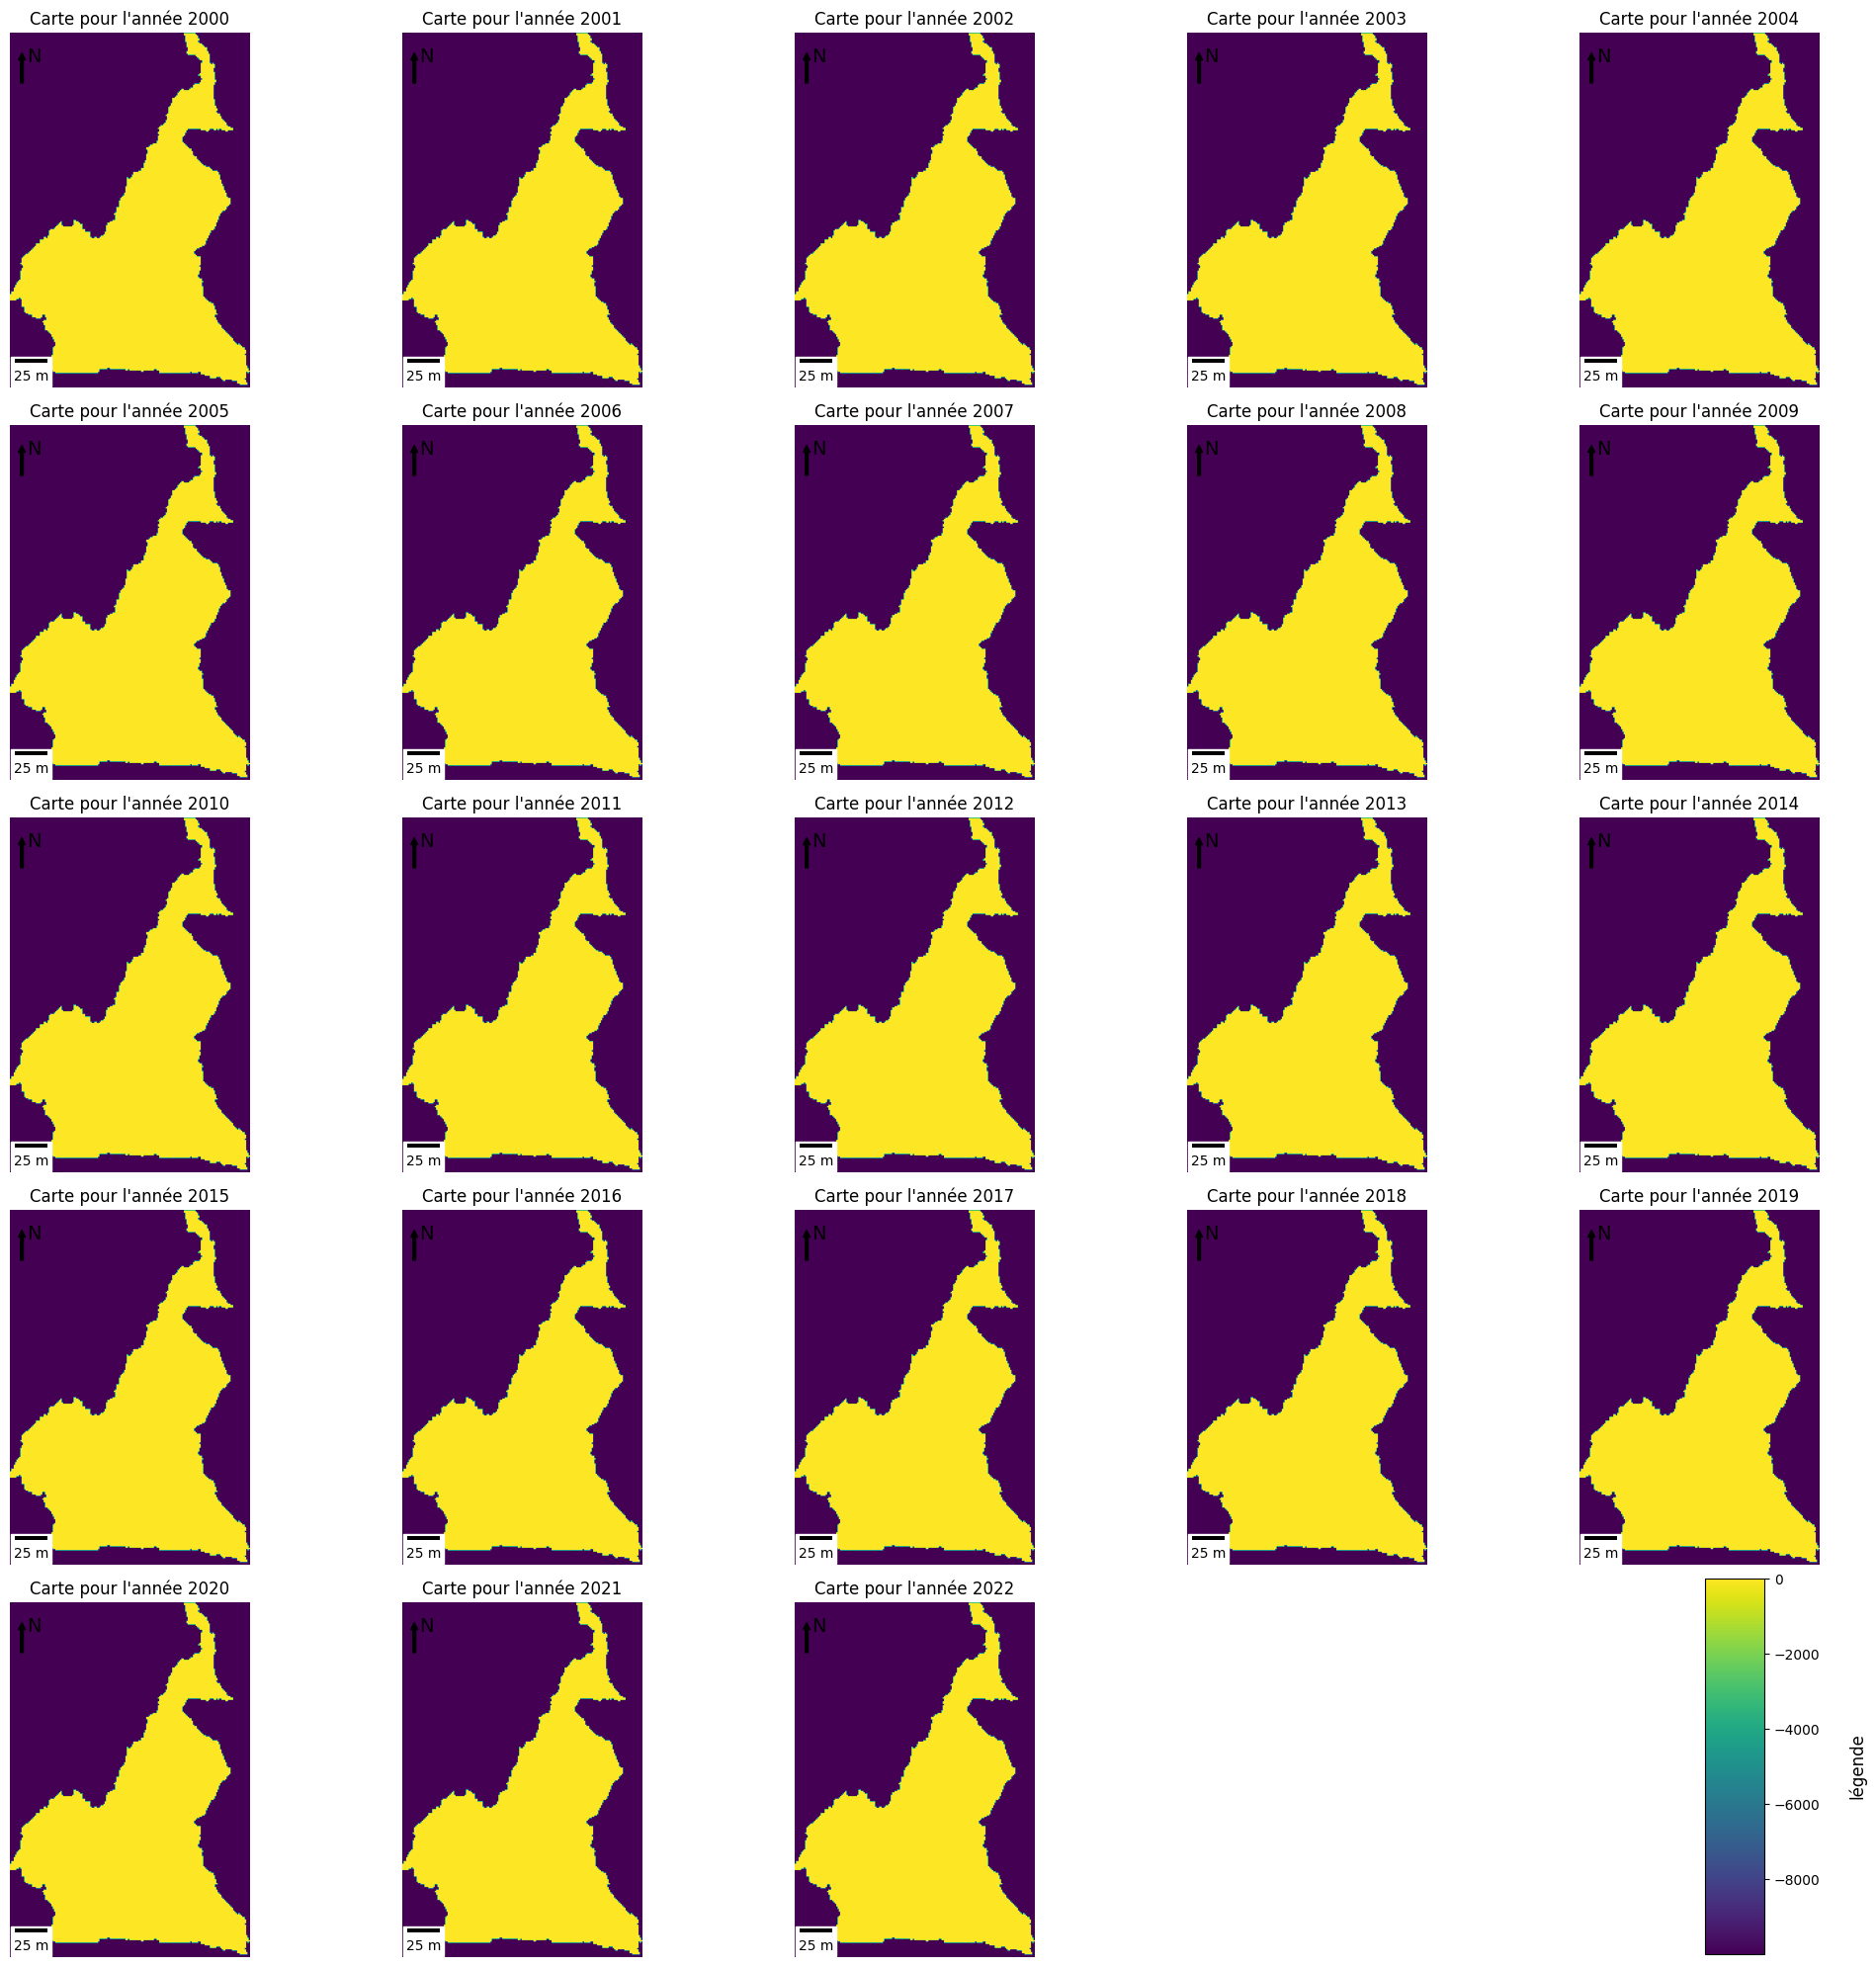

In [30]:
# Dimensions de la grille pour les subplots
n_rows, n_cols = 5, 5  #nbre de subdivisions graphiques
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))  

# affichage de chaque carte raster dans un subplot
for i, file in enumerate(tiff_files, start=2000):
    row = (i - 2000) // n_cols  
    col = (i - 2000) % n_cols   

    with rasterio.open(file) as src:
        image = src.read(1)

        # Afficher l'image raster dans le subplot correspondant
        im = axs[row, col].imshow(image, cmap='viridis')
        axs[row, col].set_title(f"Carte pour l'année {i}")
        axs[row, col].axis('off')

        #flèche du nord
        axs[row, col].annotate(
            '', xy=(0.05, 0.95), xytext=(0.05, 0.85),  # Coordonnées pour la flèche
            arrowprops=dict(arrowstyle="simple", color="black"),
            xycoords='axes fraction', textcoords='axes fraction'
        )
        axs[row, col].text(0.1, 0.93, 'N', transform=axs[row, col].transAxes, ha='center', va='center', fontsize=14, color='black')

        # échelle  en bas à gauche
        scalebar = ScaleBar(dx=1, units="m", location="lower left", length_fraction=0.25)  # Ajuste dx selon tes unités
        axs[row, col].add_artist(scalebar)

# Retirer les axes vides (s'il y a moins de cartes que d'espaces de sous-graphes)
for j in range(i - 1999, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

# Ajouter une légende tout en bas à droite
cbar_ax = fig.add_axes([0.9, 0.009, 0.03, 0.19])  
cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')


cbar.set_label('légende', fontsize=12, labelpad=20)

plt.tight_layout()
plt.show()


### Enlevons les valeurs qui ne font pas partie de notre zone d'intérêt pour mieux visualiser

In [31]:

def visualiser_rasters(tiff_files, nodata=-9999):
    # Dimensions de la grille pour les subplots
    n_rows, n_cols = 5, 5  
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))  

    # Boucle pour afficher chaque carte raster dans un subplot
    for i, file in enumerate(tiff_files, start=2000):
        row = (i - 2000) // n_cols  
        col = (i - 2000) % n_cols   

        with rasterio.open(file) as src:
            image = src.read(1)

            # masque pour les valeurs négatives ie manquentes ou aberrantes
            image = np.ma.masked_where(image == nodata, image)

            # Afficher l'image raster dans le subplot correspondant
            carte = axs[row, col].imshow(image, cmap='viridis')

            # Ajouter le titre et masquer les axes
            axs[row, col].set_title(f"Carte pour l'année {i}")
            axs[row, col].axis('off')

            # Ajouter la rose des vents dans le coin supérieur gauche
            axs[row, col].annotate('N', xy=(0.05, 0.95), xycoords='axes fraction', ha='center', va='center',
                                   fontsize=12, fontweight='bold', color='black', rotation=0,
                                   xytext=(0.05, 0.85), textcoords='axes fraction',
                                   arrowprops=dict(facecolor='black', width=2, headwidth=12, headlength=12))

            # Ajouter une barre d'échelle dans le coin inférieur droit de la carte
            barre_echelle = ScaleBar(1, units="km", location="lower right", pad=0.1, border_pad=0.5,
                                     box_color="white", box_alpha=0.8)
            axs[row, col].add_artist(barre_echelle)

    # Supprimer les axes inutilisés (ceux qui restent après les graphiques)
    total_plots = len(tiff_files)
    for j in range(total_plots, n_rows * n_cols):
        fig.delaxes(axs[j // n_cols, j % n_cols])

    # Ajouter la barre de couleur partagée avec la légende idéale
    cbar_ax = fig.add_axes([0.9, 0.009, 0.03, 0.19])  
    cbar = fig.colorbar(carte, cax=cbar_ax, orientation='vertical')
    cbar.set_label('légende')

   
    plt.tight_layout()
    plt.show()



C:\Users\DELL\AppData\Local\Temp\ipykernel_13196\2994894316.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


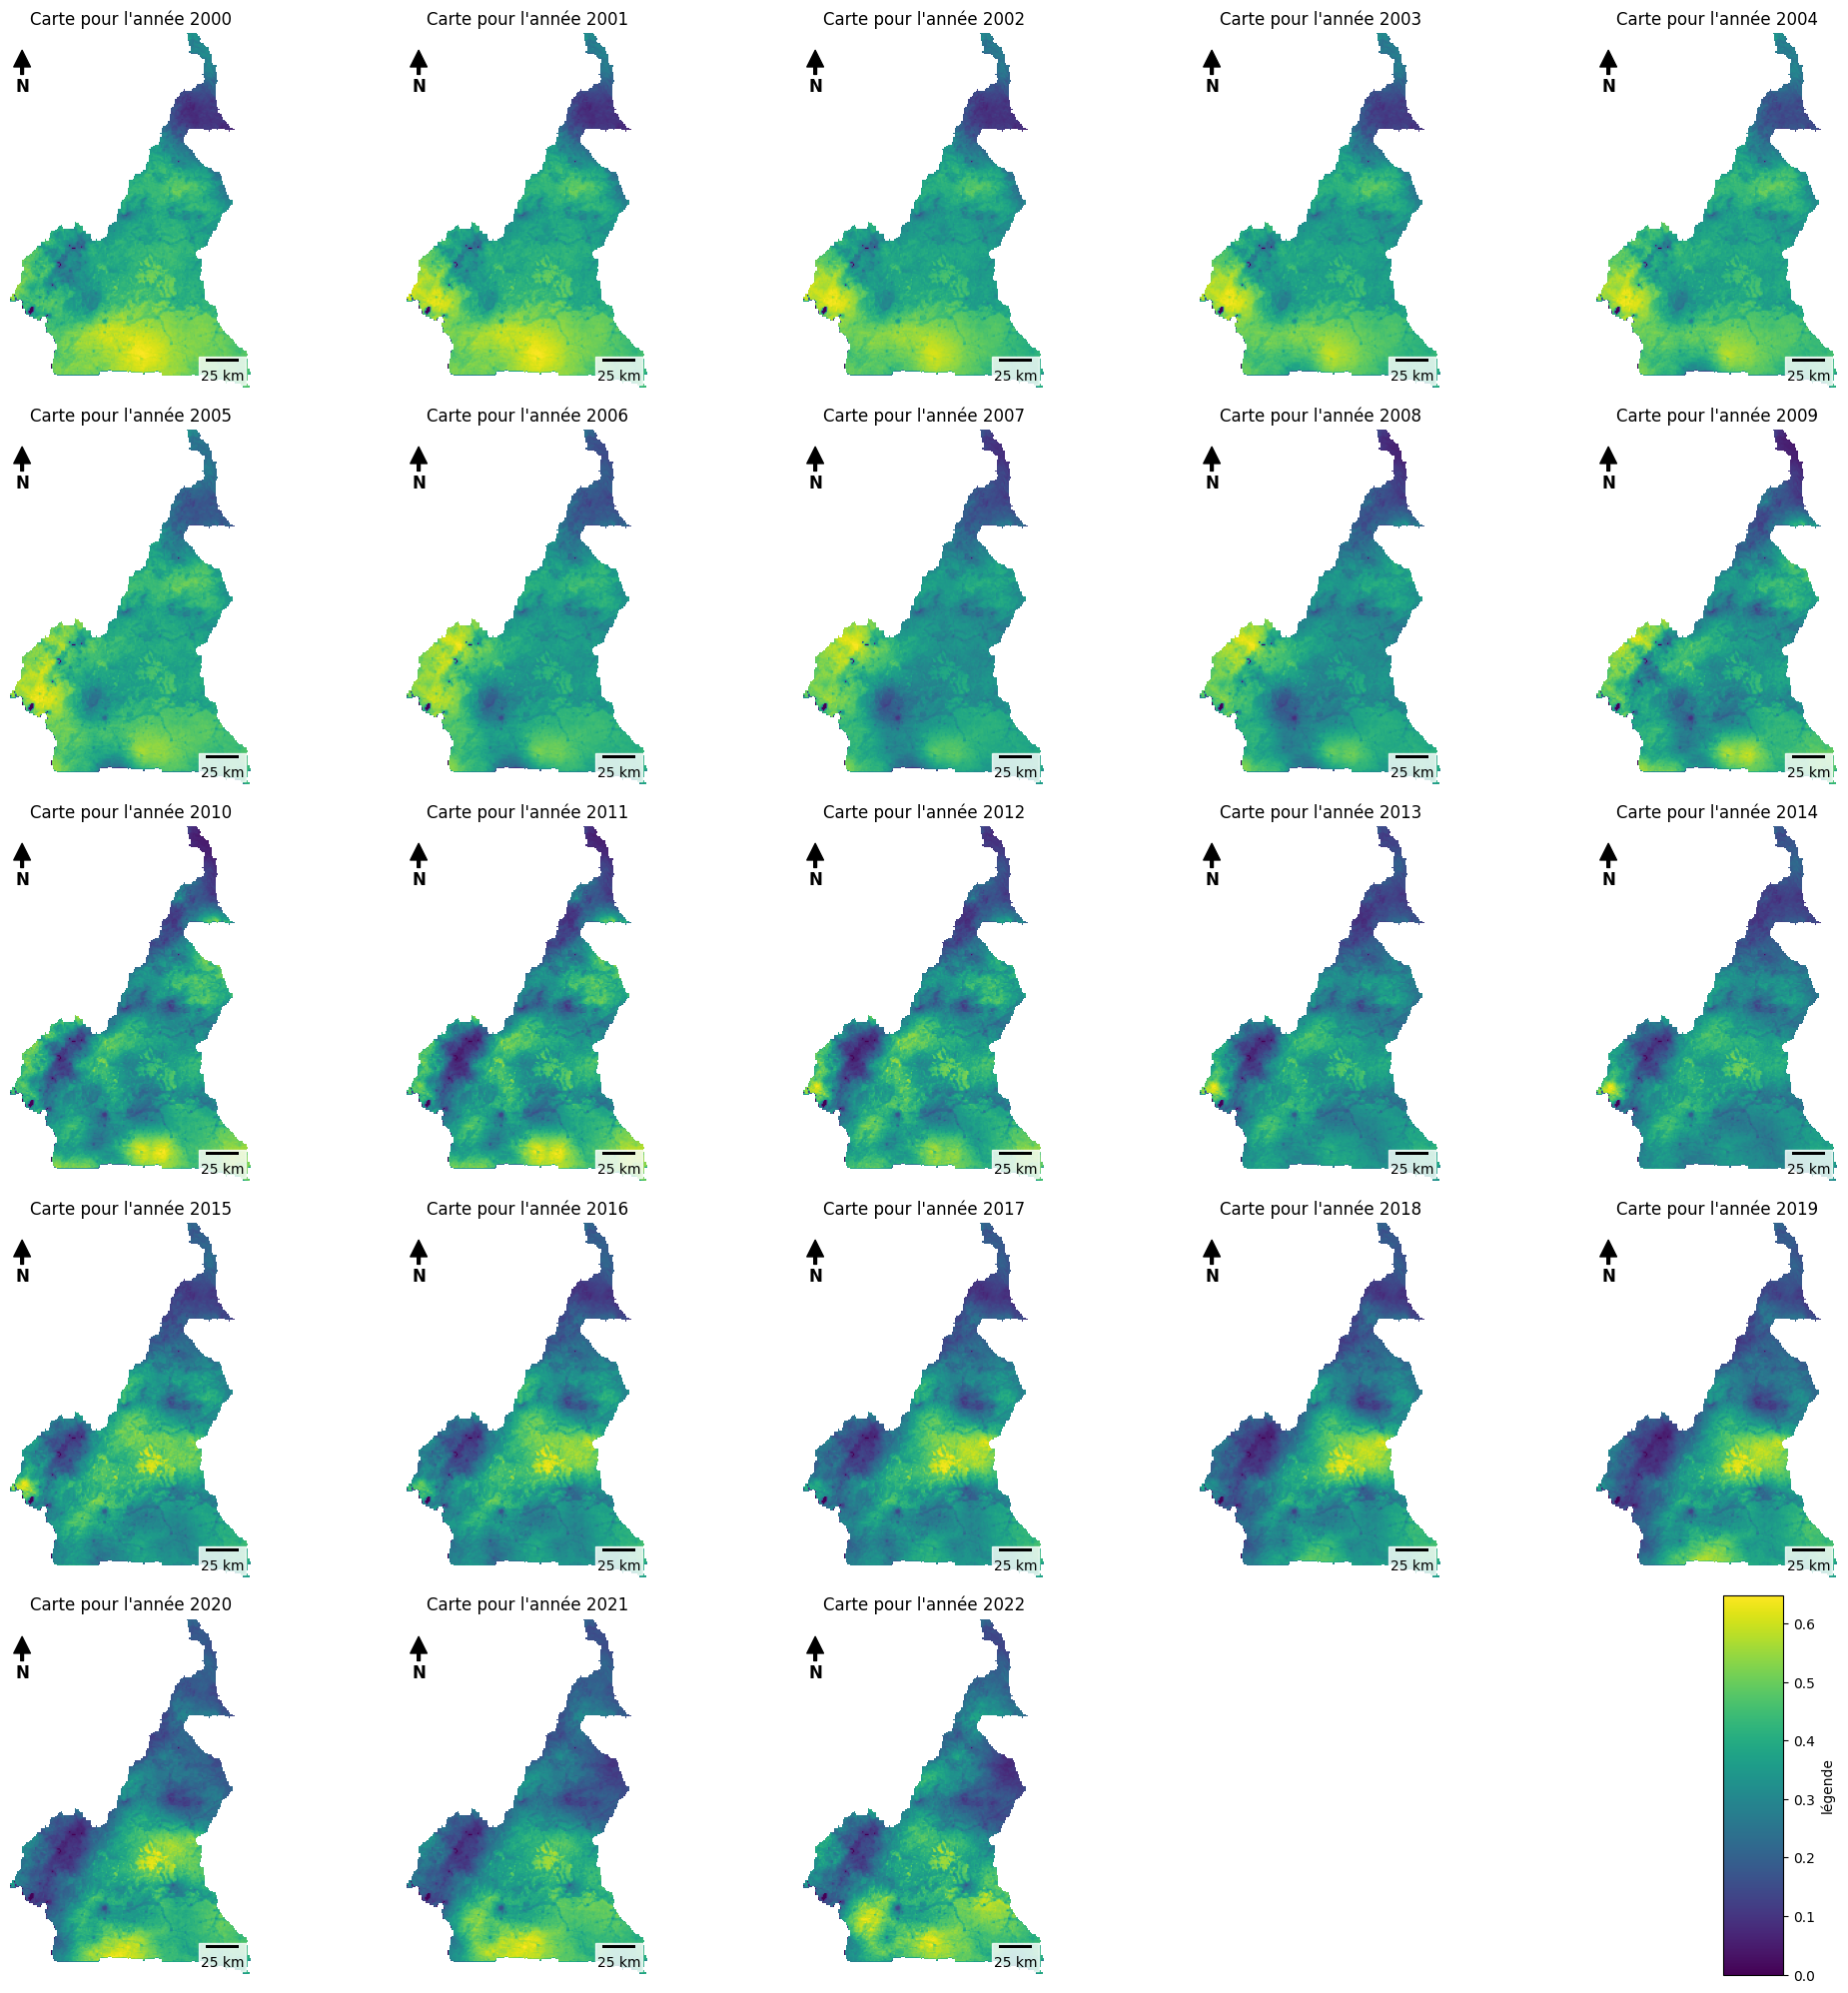

In [32]:
# Appel de notre fonction
visualiser_rasters(tiff_files)

### Pourquoi ne pas faire une petite animation ? Amusons-nous un peu !

In [33]:
# Calcul des valeurs min et max globales pour les rasters
def trouver_min_max_rasters(tiff_files, nodata=-9999):
    min_val, max_val = float('inf'), float('-inf')
    for file in tiff_files:
        with rasterio.open(file) as src:
            image = src.read(1)
            image = np.ma.masked_where(image == nodata, image)
            min_val = min(min_val, np.min(image))
            max_val = max(max_val, np.max(image))
    return min_val, max_val

In [34]:
# Afficher les rasters avec une légende fixe
def visualiser_rasters(tiff_files, min_val, max_val, nodata=-9999):
    image_paths = []
    for i, file in enumerate(tiff_files, start=2000):
        with rasterio.open(file) as src:
            image = src.read(1)
            image = np.ma.masked_where(image == nodata, image)

            fig, ax = plt.subplots(figsize=(10, 6))
            carte = ax.imshow(image, cmap='viridis', vmin=min_val, vmax=max_val)  # Fixe la légende
            plt.colorbar(carte, ax=ax, label='Légende')
            ax.set_title(f"Carte pour l'année {i}")
            ax.axis('off')

            # flèche nord et échelle
            ax.annotate('N', xy=(0.05, 0.95), xycoords='axes fraction', ha='center', va='center',
                        fontsize=12, fontweight='bold', color='black', xytext=(0.05, 0.85),
                        arrowprops=dict(facecolor='black', width=2, headwidth=12, headlength=12))
            barre_echelle = ScaleBar(1, units="km", location="lower right", pad=0.1, border_pad=0.5,
                                     box_color="white", box_alpha=0.8)
            ax.add_artist(barre_echelle)

            # Enregistrer l'image temporaire
            output_path = f'carte_{i}.png'
            plt.savefig(output_path, bbox_inches='tight', dpi=300)
            plt.close()
            image_paths.append(output_path)

    return image_paths


In [35]:
# Créer l'image GIF par superposition des différentes images
def create_gif(image_paths, output_gif_path, duration=150):
    images = [Image.open(image_path) for image_path in image_paths]
    images[0].save(output_gif_path, save_all=True, append_images=images[1:], duration=duration, loop=0)

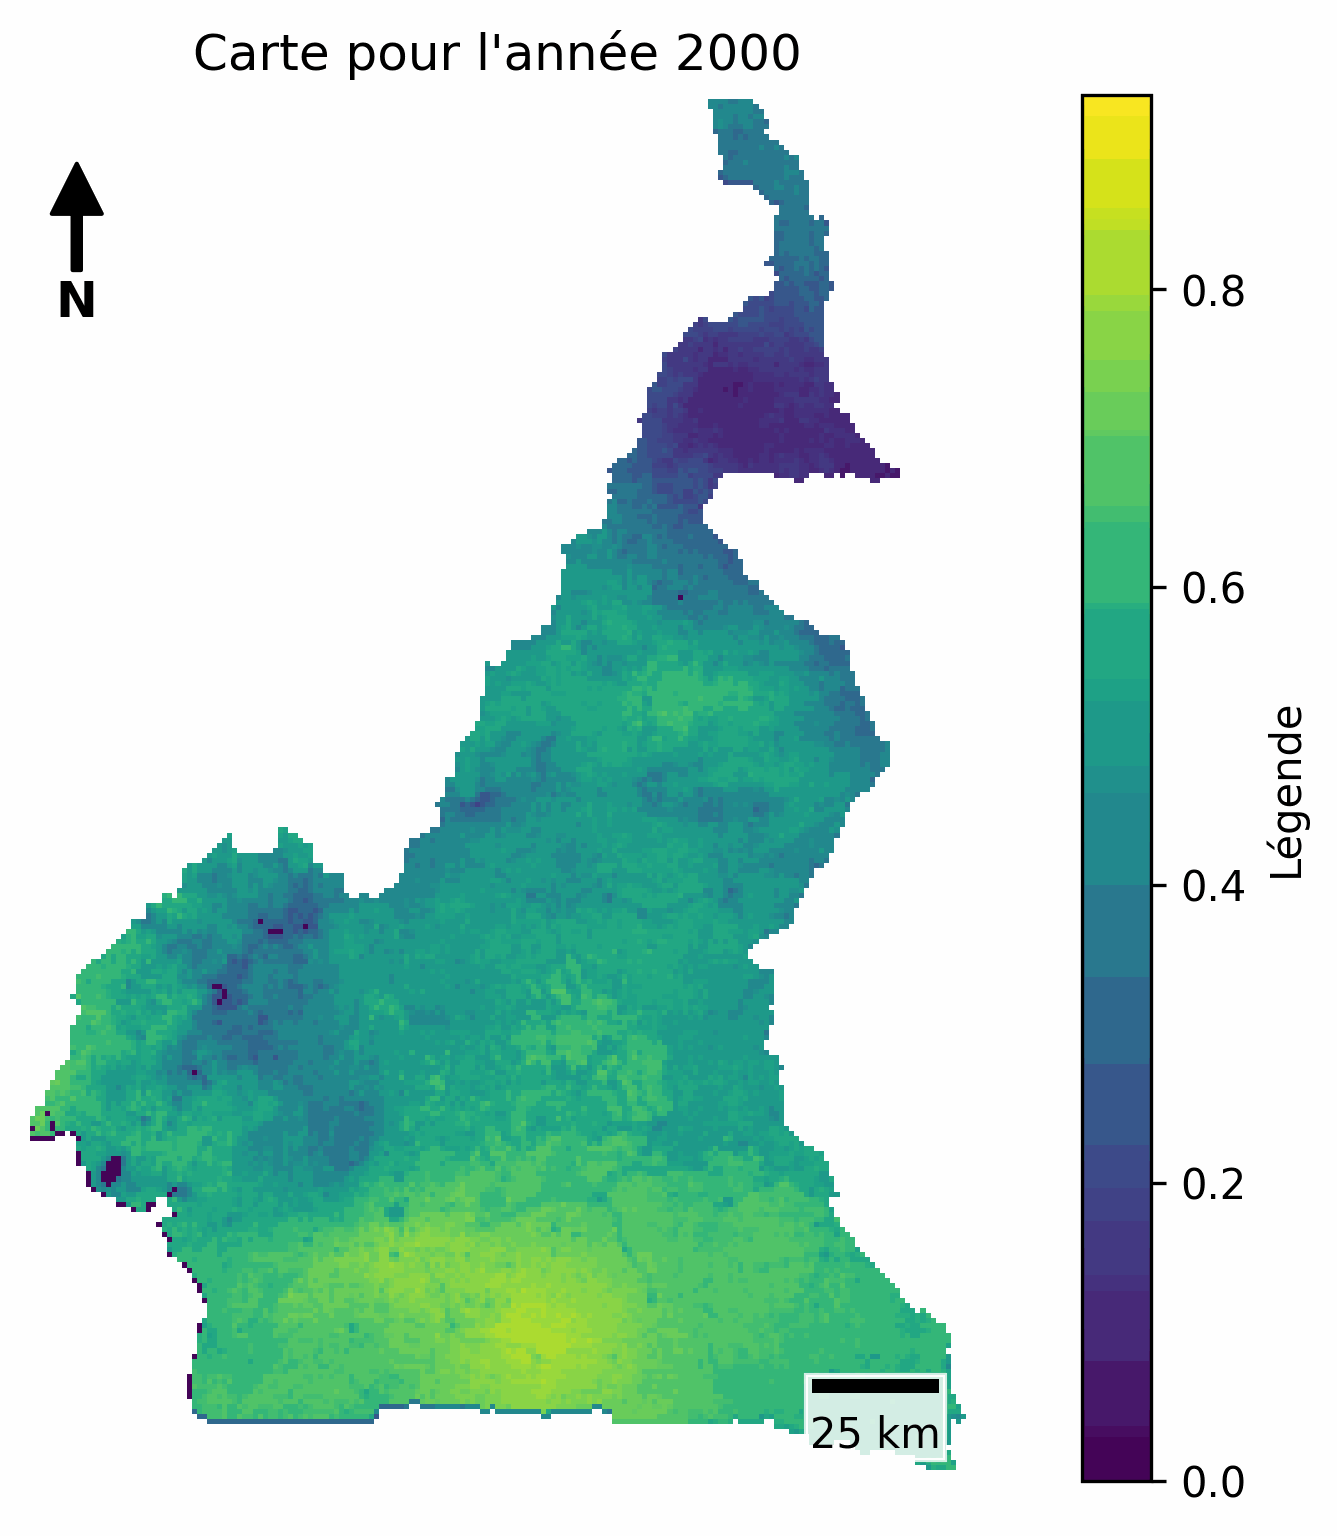

In [36]:
# On veut garder la même légende pour chaque image
# Utilisation des fonctions

min_val, max_val = trouver_min_max_rasters(tiff_files)
image_paths = visualiser_rasters(tiff_files, min_val, max_val)
output_gif_path = "output.gif"
create_gif(image_paths, output_gif_path)

# Afficher le GIF
from IPython.display import Image as IPImage, display
display(IPImage(filename=output_gif_path, width=400))

# Nettoyer les images temporaires
for image_path in image_paths:
    os.remove(image_path)


<h2 style="text-align:center; background-color:RGB(51,165,182);font-size:45px;font-family:Algerian"> Opérations sur les images </h2>

In [38]:
# Lire les rasters et les empiler dans un tableau numpy
rasters = []
for fichier in tiff_files :
    with rasterio.open(fichier) as src:
        rasters.append(src.read(1))  # Lire la première bande

In [39]:
rasters[: 1]

[array([[-9.999000e+03, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
         -9.999000e+03, -9.999000e+03],
        [-9.999000e+03, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
         -9.999000e+03, -9.999000e+03],
        [-9.999000e+03, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
         -9.999000e+03, -9.999000e+03],
        ...,
        [-9.999000e+03, -9.999000e+03, -9.999000e+03, ...,  6.130913e-01,
         -9.999000e+03, -9.999000e+03],
        [-9.999000e+03, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
         -9.999000e+03, -9.999000e+03],
        [-9.999000e+03, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
         -9.999000e+03, -9.999000e+03]], dtype=float32)]

In [41]:
# Convertir la liste en tableau numpy 3D (nombre de rasters, hauteur, largeur)
rasters_array = np.array(rasters)
print(rasters_array.shape)

(23, 274, 185)


In [42]:
# Remplacer les valeurs -9999 par NA
rasters_array = np.where(rasters_array == -9999, np.nan, rasters_array)


# Calculer les statistiques en ignorant les NA
    # Calculer les statistiques en ignorant les NA
    moyenne = np.nanmean(rasters_array, axis=0)
    moyenne = np.nan_to_num(moyenne, nan=-9999)  

    ecart_type = np.nanstd(rasters_array, axis=0)
    ecart_type = np.nan_to_num(ecart_type, nan=-9999)  

    minimum = np.nanmin(rasters_array, axis=0)
    minimum = np.nan_to_num(minimum, nan=-9999)  

    maximum = np.nanmax(rasters_array, axis=0)
    maximum = np.nan_to_num(maximum, nan=-9999)  

    mediane = np.nanmedian(rasters_array, axis=0)
    mediane = np.nan_to_num(mediane, nan=-9999)  


C:\Users\DELL\AppData\Local\Temp\ipykernel_13196\3389558579.py:9: RuntimeWarning: Mean of empty slice
  moyenne = np.nanmean(rasters_array, axis=0)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\DELL\AppData\Local\Temp\ipykernel_13196\3389558579.py:15: RuntimeWarning: All-NaN slice encountered
  minimum = np.nanmin(rasters_array, axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13196\3389558579.py:18: RuntimeWarning: All-NaN slice encountered
  maximum = np.nanmax(rasters_array, axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13196\3389558579.py:21: RuntimeWarning: All-NaN slice encountered
  mediane = np.nanmedian(rasters_array, axis=0)


In [64]:
moyenne

array([[-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       ...,
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         4.8753688e-01, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03]], dtype=float32)

### Fonction pour enregistrer un raster avec les statistiques calculées

In [65]:
def enregistrer_raster(output_path, array, reference_file):
    with rasterio.open(reference_file) as src:
        profil = src.profile
        profil.update(dtype=rasterio.float32, count=1)

        with rasterio.open(output_path, 'w', **profil) as dst:
            dst.write(array.astype(rasterio.float32), 1)

**Paramètres de la fonction :**
- `output_path` : Le chemin du fichier de sortie où le nouveau raster sera enregistré.
- `array` : Le tableau numpy contenant les données à enregistrer (les statistiques calculées, par exemple).
- `reference_file` : Le fichier raster de référence qui sera utilisé pour récupérer les métadonnées (comme la taille, la résolution, la transformation affine, et le 

In [66]:

# Enregistrer les rasters de sortie
enregistrer_raster('moyenne.tif', moyenne, tiff_files[0])
enregistrer_raster('ecart_type.tif', ecart_type, tiff_files[0])
enregistrer_raster('minimum.tif', minimum, tiff_files[0])
enregistrer_raster('maximum.tif', maximum, tiff_files[0])
enregistrer_raster('mediane.tif', maximum, tiff_files[0])

outputs=['moyenne.tif', 'ecart_type.tif', 'minimum.tif','maximum.tif', 'mediane.tif']

print("Les rasters de statistiques ont été enregistrés avec succès.")

Les rasters de statistiques ont été enregistrés avec succès.


C:\Users\samba\AppData\Local\Temp\ipykernel_37508\2203939952.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


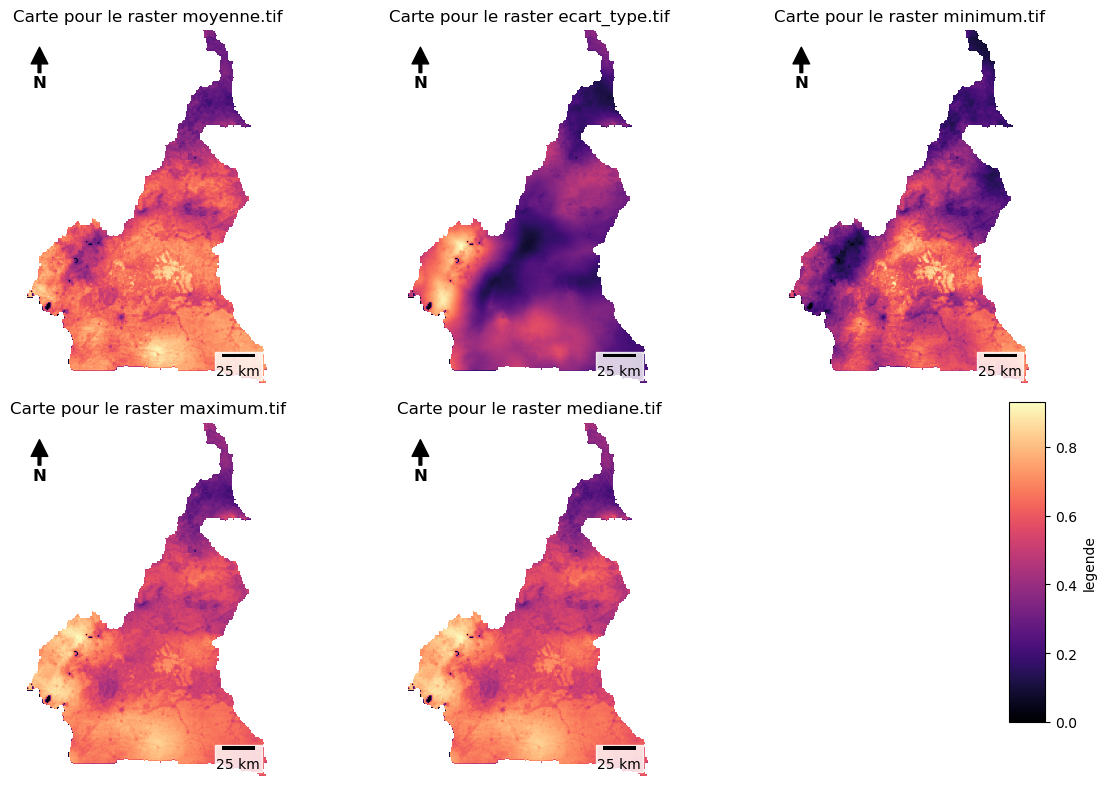

In [69]:

n_rows, n_cols = 2, 3  # pour 2 lignes et 3 colonnes pour un total de 6 positions 3 en haut 2 en base
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 8))  

# Parcours des fichiers raster
for i, file in enumerate(outputs):
    row = i // n_cols  # Calculer l'indice de la ligne
    col = i % n_cols   # Calculer l'indice de la colonne

    with rasterio.open(file) as src:
        image = src.read(1)

        # Appliquer un masque pour les valeurs négatives ou aberrantes
        image = np.ma.masked_where(image == nodata, image)

        # Afficher l'image raster dans le subplot correspondant
        im = axs[row, col].imshow(image, cmap='magma')

        # Ajouter le titre et masquer les axes
        axs[row, col].set_title(f"Carte pour le raster {file}")
        axs[row, col].axis('off')

        # Ajouter la rose des vents dans le coin supérieur gauche
        axs[row, col].annotate(
            'N', xy=(0.05, 0.95), xycoords='axes fraction', ha='center', va='center',
            fontsize=12, fontweight='bold', color='black', rotation=0,
            xytext=(0.05, 0.85), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', width=2, headwidth=12, headlength=12)
        )

        # Ajouter une barre d'échelle dans le coin inférieur droit de la carte
        barre_echelle = ScaleBar(1, units="km", location="lower right", pad=0.1, border_pad=0.5,
                                 box_color="white", box_alpha=0.8)
        axs[row, col].add_artist(barre_echelle)

# Supprimer les axes inutilisés (si on a moins de 6 graphiques)
for j in range(len(outputs), n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

# Ajouter la barre de couleur partagée (déplacée sur le côté)
cbar_ax = fig.add_axes([0.9, 0.09, 0.03, 0.4])  # Position de la barre de couleur déplacée
cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')
cbar.set_label('legende')

# Ajuster l'agencement pour un affichage propre
plt.tight_layout()
plt.show()

<!-- .element: class="fragment" -->

<h1 style="text-align:center; background-color:RGB(255, 165, 0);font-size:35px;font-family:Algerian"> <br> FIN DU SCRIPT <br> </h1>

________________________